In [5]:
import pandas as pd

# Load Titanic dataset (you can replace this with your own dataset path)
df = pd.read_csv('/content/gender_submission (1).csv')

# Preview the data
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe(include='all'))

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
PassengerId    0
Survived       0
dtype: int64
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


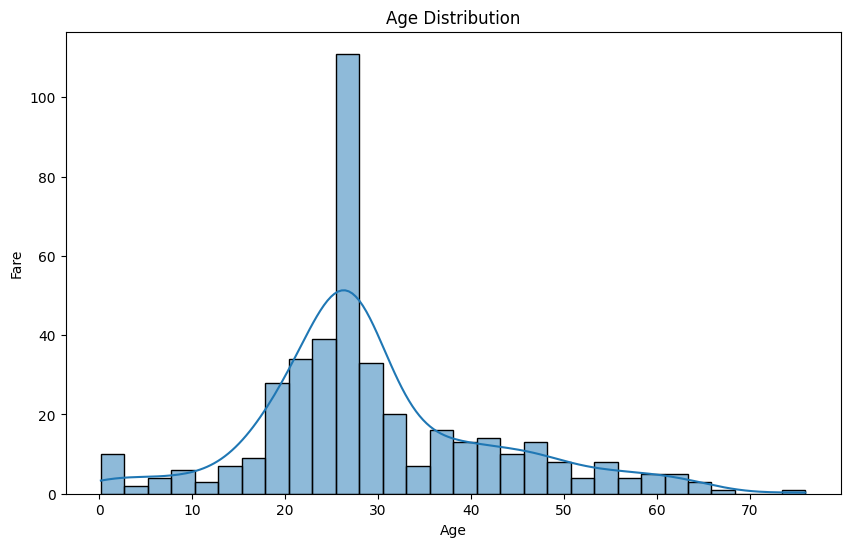

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

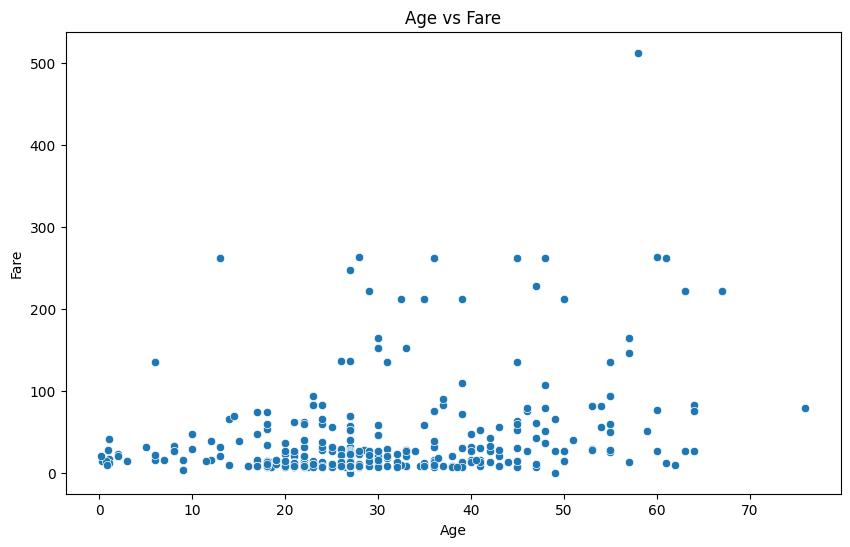

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


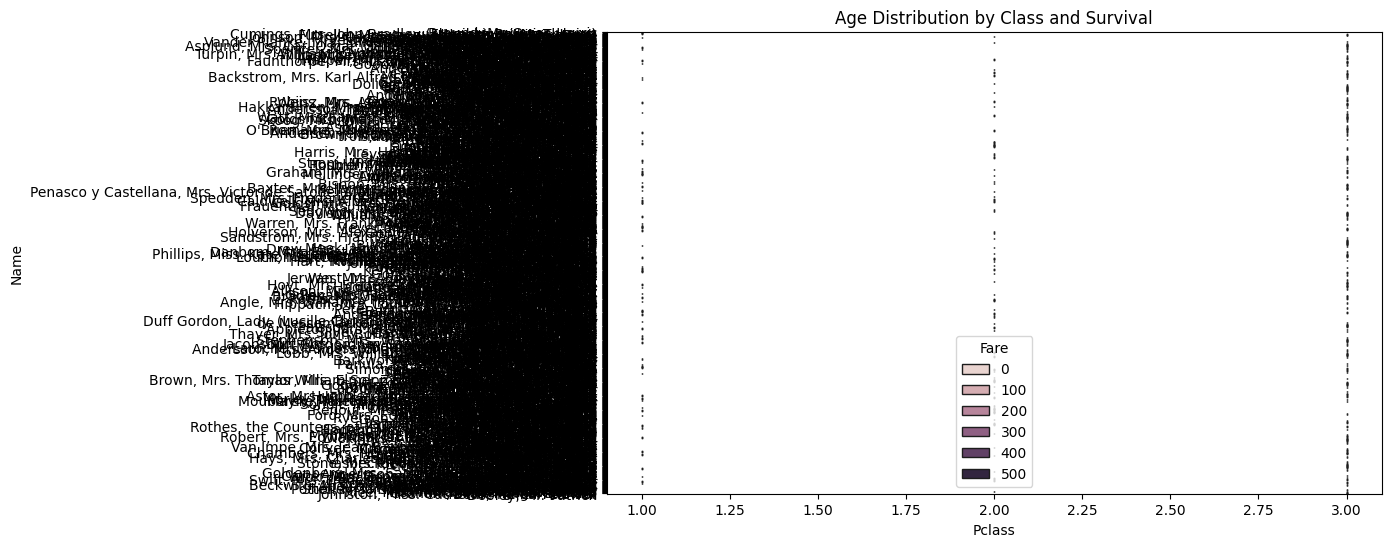

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Name', hue='Fare', data=df)
plt.title('Age Distribution by Class and Survival')
plt.show()

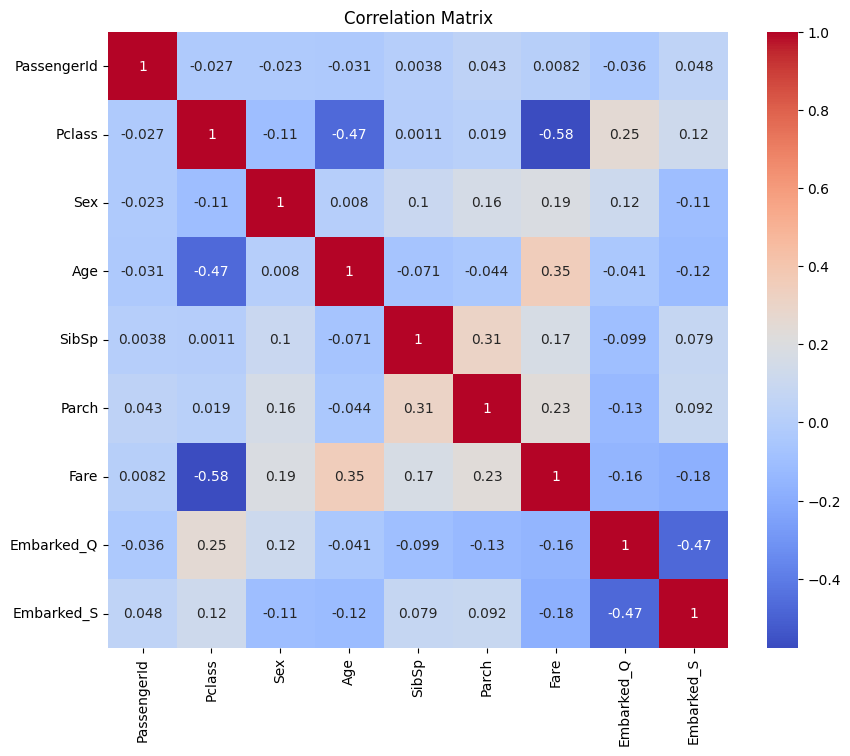

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['Name', 'Ticket'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()